In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
spark = SparkSession.builder.appName('733').getOrCreate()
sc = spark.sparkContext

# aaer = spark.read.csv('../data/dgls_integrated.csv', header=True, inferSchema=True)

In [2]:
import pandas as pd
pd_aaer = pd.read_csv('../data/dgls_integrated.csv')

In [8]:
reasons = ["EXPLANATION","AUDIT","BRIBES","DISCLOSURE","NODATES","OTHER","REV","REC","COGS","INV","RES","DEBT","MKT_SEC","INC_EXP_SE","ASSET","PAY","LIAB","FIGURE"]

In [9]:
pd_simple = pd_aaer.loc[:, reasons]

In [14]:
some_df = spark.createDataFrame(pd_simple)

In [21]:
from operator import add
from functools import reduce
import pyspark.sql.functions as F
numeric_col_list = [k for (k,v) in some_df.dtypes if v == 'double']
sums = some_df.select([F.sum(c).alias('num_'+c) for c in numeric_col_list])

In [25]:
sums_list = list(sums.collect())

In [51]:
new_dict = sums.toPandas().to_dict(orient='list')

In [107]:

ult_dict = {}
ult_dict = {k.split('_')[1].lower():v[0] for (k,v) in new_dict.items()}
ult_dict

{'asset': 595.0,
 'audit': 5.0,
 'bribes': 14.0,
 'cogs': 212.0,
 'debt': 59.0,
 'disclosure': 29.0,
 'inc': 962.0,
 'inv': 263.0,
 'liab': 191.0,
 'mkt': 68.0,
 'nodates': 0.0,
 'other': 24.0,
 'pay': 53.0,
 'rec': 348.0,
 'res': 223.0,
 'rev': 933.0}

In [108]:
ult_list = sorted(ult_dict.items(), key=lambda x: -x[1])

In [109]:
super_dict = {k:v for (k,v) in ult_list}
super_dict

{'asset': 595.0,
 'audit': 5.0,
 'bribes': 14.0,
 'cogs': 212.0,
 'debt': 59.0,
 'disclosure': 29.0,
 'inc': 962.0,
 'inv': 263.0,
 'liab': 191.0,
 'mkt': 68.0,
 'nodates': 0.0,
 'other': 24.0,
 'pay': 53.0,
 'rec': 348.0,
 'res': 223.0,
 'rev': 933.0}

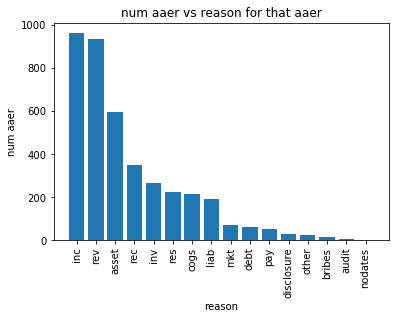

In [112]:
import matplotlib.pyplot as plt

D = {u'Label1':26, u'Label2': 17, u'Label3':30}
D = super_dict
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation = 90)
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.xlabel('reason')
plt.ylabel('num aaer')
plt.title('num aaer vs reason for that aaer')
plt.show()